# Nos EUA, o número 911 é destinado à emergências. O Kaggle disponibilizou dados de ligações para o serviço:

    lat: Variável String, Latitude
    lng: Variável String, Longitude
    desc: Variável String, Descrição da Chamada de Emergência
    zip: Variável String, CEP
    título: Variável String, Título
    timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
    twp: Variável String, Township
    addr: Variável String, Endereço
    e: Variável String, variável Dummy (sempre 1)
    
    Siglas:
    
    EMS	emergency medical service
    



In [8]:
import pandas as pd
import numpy as np
import calendar
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [9]:
call = pd.read_csv('/temp/911.csv', ',')

In [10]:
#primeiros tratamentos no dataset

#excluindo variaveis que não serão utéis
df = call.drop(['e'], axis=1, inplace=False)
df = df.drop(['zip'], axis=1, inplace=False)

#criando variavel reason / motivos
df['Type'] = call['title'].str.split(':',1, expand=True)[0]
df['Reason'] = call['title'].str.split(':',1, expand=True)[1]
#cria lista com os nomes da semana
wday = list(calendar.day_abbr)

#convertendo para datatime e criando as variaveis de hour / hora, day / dia, month / mes, year / ano, week / semana
df['timeStamp'] = pd.to_datetime(call['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Day'] = df['timeStamp'].apply(lambda x: x.day)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Year'] = df['timeStamp'].apply(lambda x: x.year)
df['Week'] = df['timeStamp'].apply(lambda x: wday[x.weekday()])



In [11]:
df.head(1)

,lat,lng,desc,title,timeStamp,twp,addr,Type,Reason,Hour,Day,Month,Year,Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,17,10,12,2015,Thu


In [12]:
resposta = [["Type","Qualitativa Nominal"],
            ["Reason","Qualitativa Nominal"],
            ["Week","Qualitativa Nominal"],
            ["Month","Quantitativa Discreta"],
            ["Year","Quantitativa Discreta"],
            ["Hour","Quantitativa Discreta"]]
variaveis = pd.DataFrame(resposta, columns=["Variavel", "Classificação"])
variaveis

,Variavel,Classificação
0,Type,Qualitativa Nominal
1,Reason,Qualitativa Nominal
2,Week,Qualitativa Nominal
3,Month,Quantitativa Discreta
4,Year,Quantitativa Discreta
5,Hour,Quantitativa Discreta


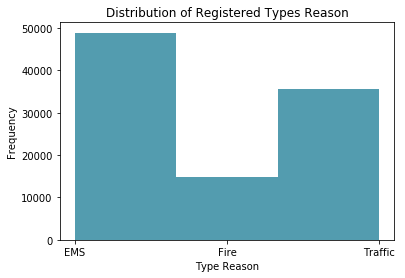

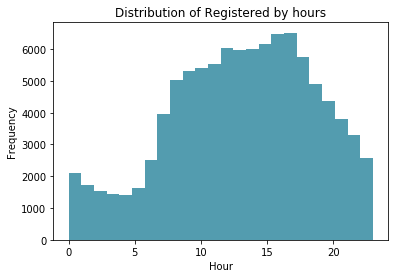

In [49]:
# Define a function for a histogram
def histogram(data, x_label, y_label, title, n_bins):
    _, ax = plt.subplots()
    ax.hist(data, color = '#539caf', bins=n_bins)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# Histograma 
histogram(data = df['Type'],
          x_label = 'Type Reason',
          y_label = 'Frequency',
          title = 'Distribution of Registered Types Reason',
          n_bins = 3 )

# Histograma 1
histogram(data = df['Hour'],
          x_label = 'Hour',
          y_label = 'Frequency',
          title = 'Distribution of Registered by hours',
          n_bins = 24 )
